# Stock Forecasting using Prophet (Saturating Growth)

https://facebook.github.io/prophet/

In [16]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
yf.pdr_override()

In [17]:
stock = 'TSLA' # input
start = '2012-01-01' # input 
end = '2022-04-29'  # input
df = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [18]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,5.788,5.900,5.530,5.616,5.616,4640500
2012-01-04,5.642,5.734,5.500,5.542,5.542,3150500
2012-01-05,5.552,5.586,5.370,5.424,5.424,5027500
2012-01-06,5.440,5.558,5.282,5.382,5.382,4931500
2012-01-09,5.400,5.498,5.224,5.450,5.450,4485000


In [19]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-22,1014.909973,1034.849976,994.000000,1005.049988,1005.049988,23181600
2022-04-25,978.969971,1008.619995,975.299988,998.020020,998.020020,22780400
2022-04-26,995.429993,1000.000000,875.000000,876.419983,876.419983,45377900
2022-04-27,898.580017,918.000000,877.359985,881.510010,881.510010,25652100
2022-04-28,899.979980,899.469971,821.700012,877.510010,877.510010,40815887


In [20]:
df = df.reset_index()
df = df.rename(columns={'Date': 'ds', 'Close': 'y'})
df

,ds,Open,High,Low,y,Adj Close,Volume
0,2012-01-03,5.788000,5.900000,5.530000,5.616000,5.616000,4640500
1,2012-01-04,5.642000,5.734000,5.500000,5.542000,5.542000,3150500
2,2012-01-05,5.552000,5.586000,5.370000,5.424000,5.424000,5027500
3,2012-01-06,5.440000,5.558000,5.282000,5.382000,5.382000,4931500
4,2012-01-09,5.400000,5.498000,5.224000,5.450000,5.450000,4485000
...,...,...,...,...,...,...,...
2593,2022-04-22,1014.909973,1034.849976,994.000000,1005.049988,1005.049988,23181600
2594,2022-04-25,978.969971,1008.619995,975.299988,998.020020,998.020020,22780400
2595,2022-04-26,995.429993,1000.000000,875.000000,876.419983,876.419983,45377900
2596,2022-04-27,898.580017,918.000000,877.359985,881.510010,881.510010,25652100


In [21]:
df = df[['ds', 'y']]
df.head()

,ds,y
0,2012-01-03,5.616
1,2012-01-04,5.542
2,2012-01-05,5.424
3,2012-01-06,5.382
4,2012-01-09,5.450


In [22]:
df['cap'] = 1200

In [23]:
m = Prophet(growth='logistic', daily_seasonality=True)
m.fit(df)

Initial log joint probability = -34.6846


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6366.34     0.0188852       178.352           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6440.74    0.00120486       85.8467           1           1      253   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6446.46    0.00068346       79.9335       1.929      0.1929      373   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     356       6458.07   0.000107748       239.628   4.766e-07       0.001      498  LS failed, Hessian reset 
     399       6462.61    0.00273047        324.08           1           1      556   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     488       6483.58   0.000348708       449.843   8.925e-07       0.001      7

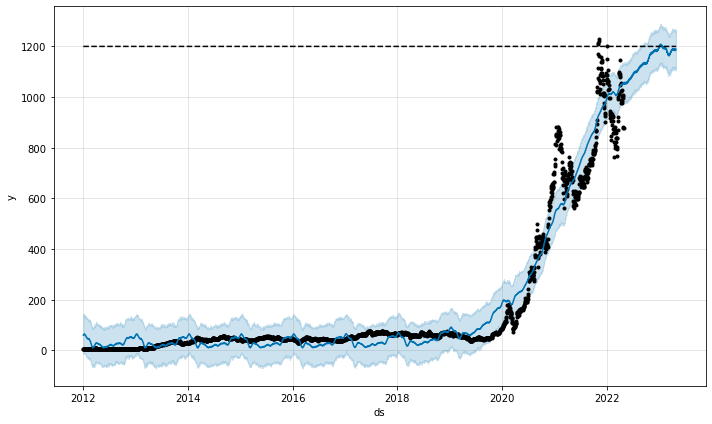

In [24]:
future = m.make_future_dataframe(periods=365)
future['cap'] = 1200
fcst = m.predict(future)
fig = m.plot(fcst)

### Saturating Minimum

Initial log joint probability = -1229.67
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      45       2372.35   1.72829e-07       100.227      0.5423      0.5423       61   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


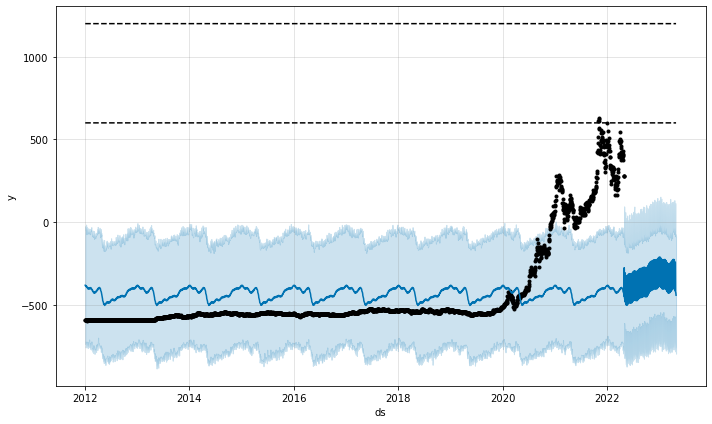

In [26]:
df['y'] = 600-df['y']
df['cap'] = 1200
df['floor'] = 600
future['cap'] = 1200
future['floor'] = 600
m = Prophet(growth='logistic', daily_seasonality=True)
m.fit(df)
fcst = m.predict(future)
fig = m.plot(fcst)